In [1]:

import pandas
from matplotlib import pyplot

from deps.data import load_metadata
from deps.logger import logger
from hcve_lib.analysis import missing_values
from hcve_lib.data import format_value, find_item
from hcve_lib.visualisation import display_number, b, p
from hcve_lib.visualisation import histogram
from hcve_lib.visualisation import make_subplots

pandas.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %config InlineBackend.figure_format='retina'
pyplot.rcParams['figure.facecolor'] = 'white'
logger.setLevel('DEBUG')


/home/sitnarf/.local/share/virtualenvs/homage-fl-Ms4N7PDp/lib/python3.9/site-packages/dash_bootstrap_components/_table.py:5: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [2]:
from deps.data import load_raw_data, load_data

metadata = load_metadata()
data = load_data(metadata)

raw_data = load_raw_data()
raw_data_subset = raw_data.loc[data.index]

Raw data
	n cohorts=21
	n individuals=52,585

Baseline visit kept
 	n individuals removed=5,529

 	n individuals=47,056

HF cohorts removed
	n cohorts removed=3: hfgr, timechf, leitzaran
	n individuals removed=1,073

	n cohorts=18
	n individuals=45,983

No outcome cohorts removed
	n cohorts removed=5: biomarcoeurs, dyda, epath, iblomaved, stophf
	n individuals removed=3,077

	n cohorts=13
	n individuals=42,906

Missing HF data cohorts removed
	n cohorts removed=6: adelhyde, gecoh, r2c2, reve(1-2), stanislas, styrianvitd
	n individuals removed=6,209

	n cohorts=7
	n individuals=36,697

Missing blood pressure measurements
 	n individuals removed=434

 	n individuals=36,263

Providing missing PP for 3075individuals

HF individuals at baseline removed
 	n individuals removed=2,953

 	n individuals=33,310

Missing outcome individuals removed
 	n individuals removed=904

 	n individuals=32,406

Final dataset
	n individuals=32,406
	n cohorts=7



In [3]:
remove_missing = ['DEPRESSION', 'BNP', 'LPA', 'FIBRINOGEN', 'HOMOCYST', 'EGFR']

from hcve_lib.formatting import format_percents
from hcve_lib.data import format_identifier

missing = [
    (column, data[column].isna().sum()/len(data[column]))
    for column in data.columns
]
missing = sorted(missing, key=lambda item: item[1], reverse=True)


for column, missing_percent in missing:
    print(f'{format_percents(missing_percent):6} [{column}]: {format_identifier(column, metadata)}')


40.6%  [FNFHF]: Fatal or non-fatal heart failure
40.6%  [FUFNFHF]: FUFNFHF
37.9%  [CI]: Cornell index_frame
37.5%  [SOK]: Sokolow-Lyon index_frame
27.4%  [HAF]: History of atrial fibrillation
26.4%  [QRS]: QRS duration
25.6%  [TRT_LIP]: Intake of lipid-lowering medication
20.1%  [CREA]: Serum creatinine
11.4%  [TRT_ACE]: Intake of angiotensin converting enzyme inhibitors
11.4%  [TRT_CCB]: Intake of calcium channel blockers
11.4%  [TRT_BB]: Intake of beta-blokcers
11.4%  [TRT_ARB]: Intake of angiotensin II receptor blockers
11.4%  [TRT_DIUR]: Intake of diuretics
8.0%   [LDL]: LDL-cholesterol
6.9%   [GLU]: Blood glucose
6.7%   [TG]: Triglycerides
1.9%   [DRK]: Alcohol intake
1.2%   [HDL]: HDL-cholesterol
1.2%   [CHOL]: Total cholesterol
0.4%   [HR]: Heart rate
0.4%   [SMK]: Smoking status
0.3%   [BMI]: Body-mass index_frame
0.2%   [BW]: Body weight
0.2%   [HPAD]: History of peripheral artery disease
0.2%   [BH]: Body height
0.2%   [HCV]: History of cardiovascular disease
0.1%   [HCAD]: H

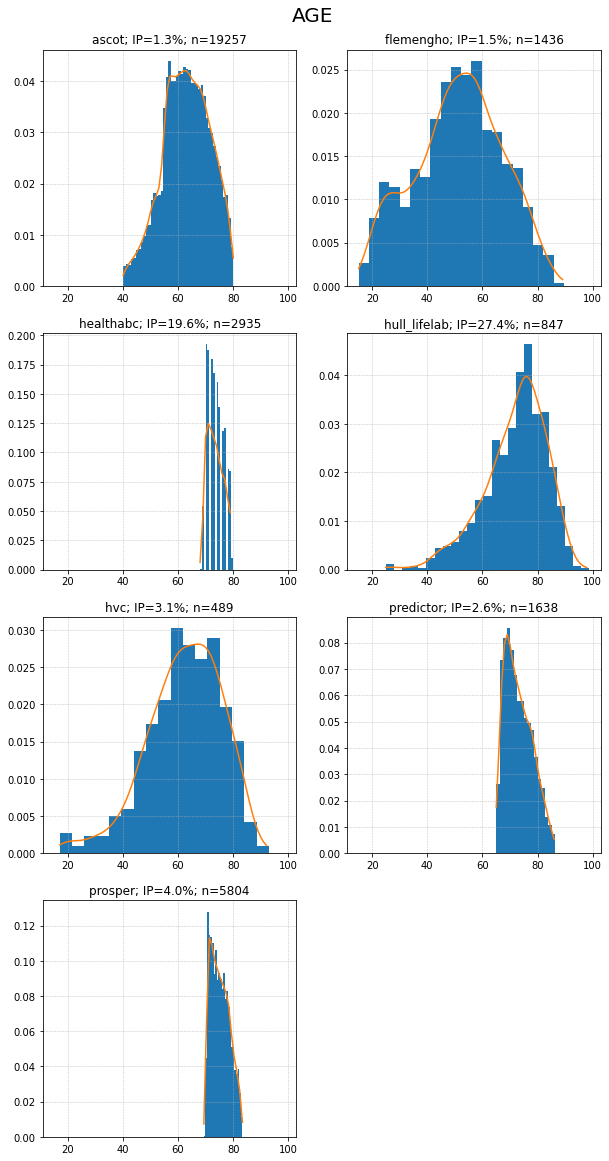

In [4]:
cohorts = data.groupby('STUDY_NUM')
axes, fig = make_subplots(len(cohorts), columns=2, sharex=True)
fig.suptitle('AGE', fontsize=20, y=0.91)
for ax, (study_num, cohort) in zip(axes, cohorts):
    ax.set_title(f'{format_value(study_num, find_item("STUDY_NUM", metadata))}; IP={format_percents(len(cohort["NFHF"][cohort["NFHF"] == 1]) / len(cohort))}; n={len(cohort)}')
    histogram(cohort['AGE'], ax=ax)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.set_xlabel(None)
    ax.plot()


In [5]:

b('Input rows')
display_number(len(data))

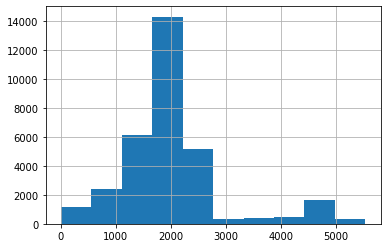

In [6]:
b('Cardiovascular death FU histogram')

data['FUFCV'].hist()
pyplot.show()


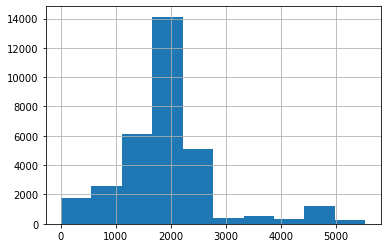

In [7]:
b('Non-fatal heart failure FU histogram')
data['FUNFHF'].hist();


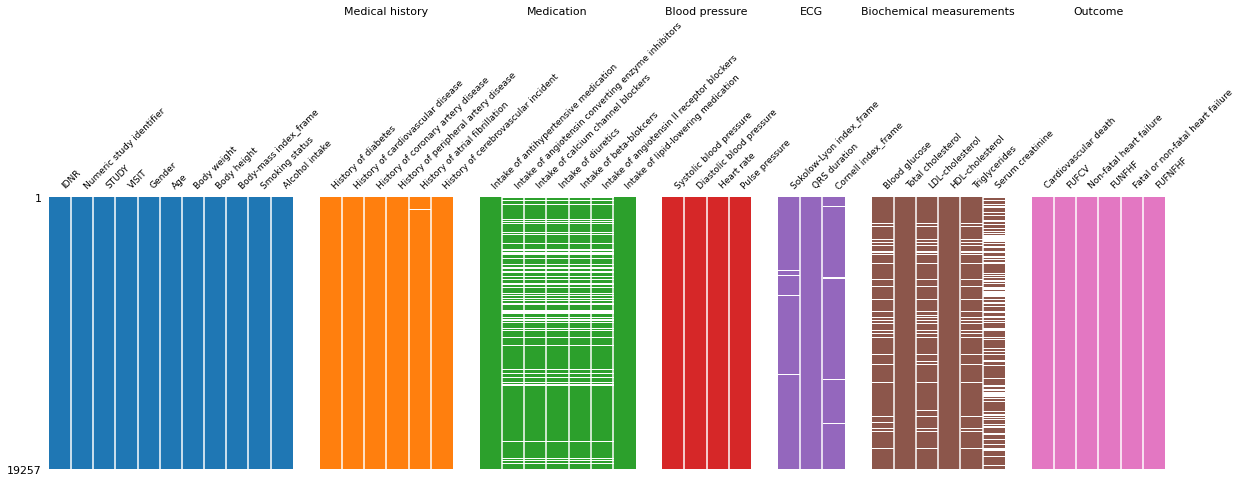

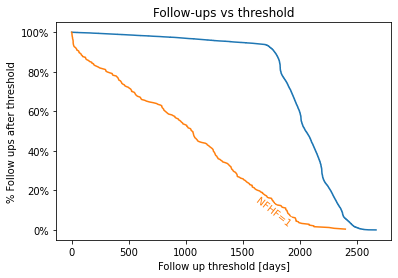

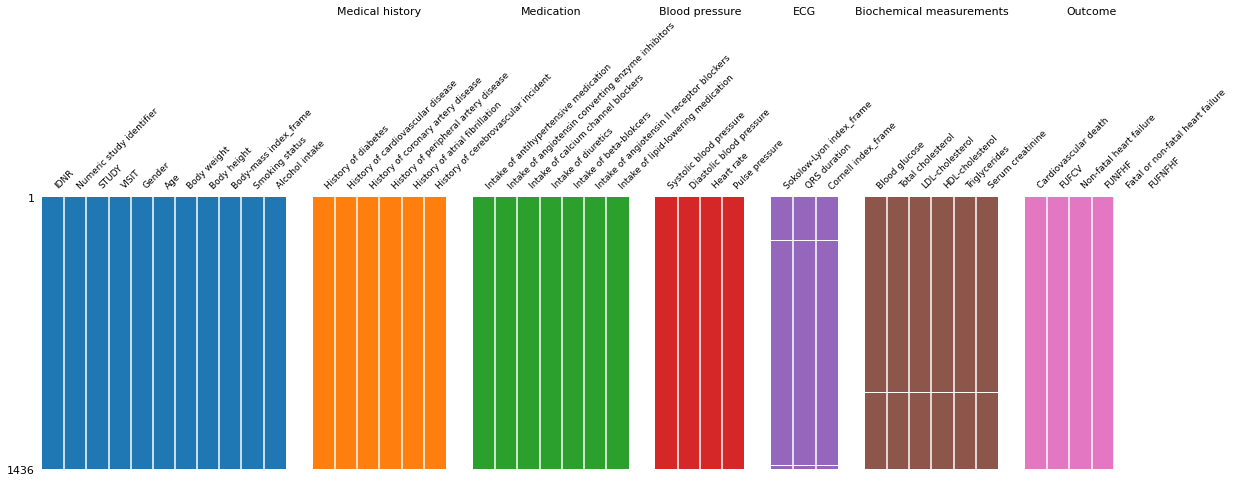

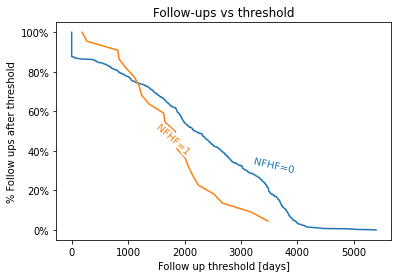

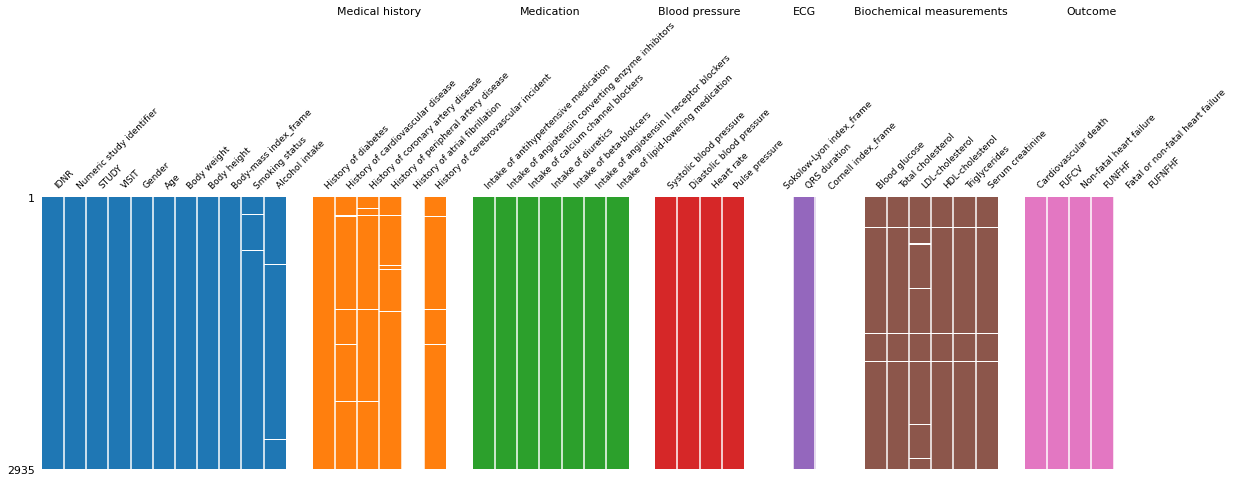

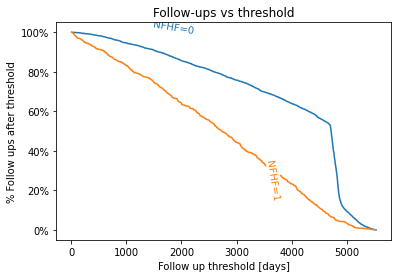

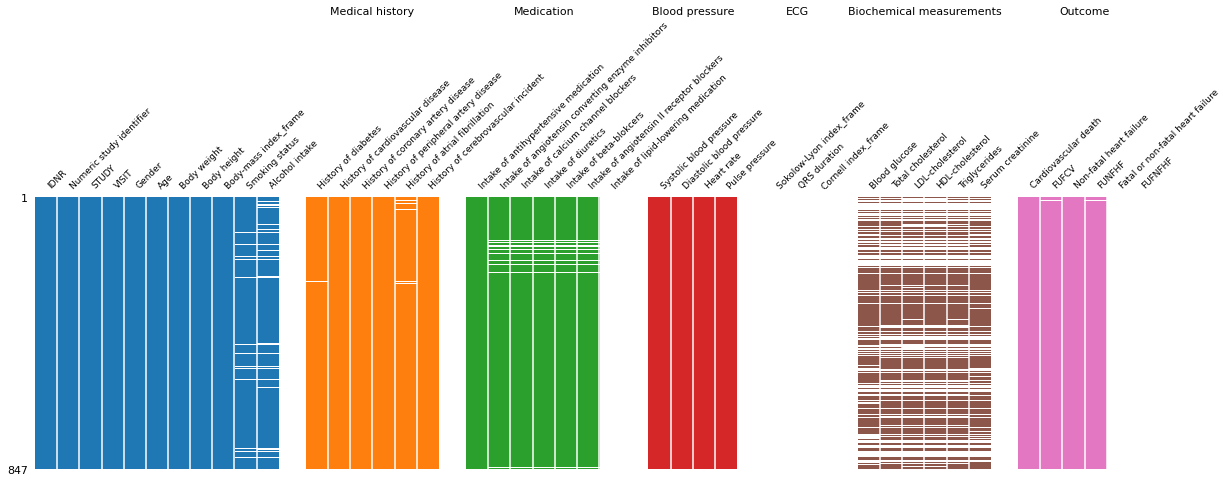

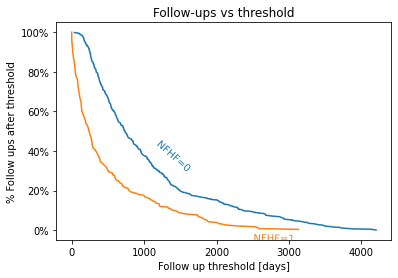

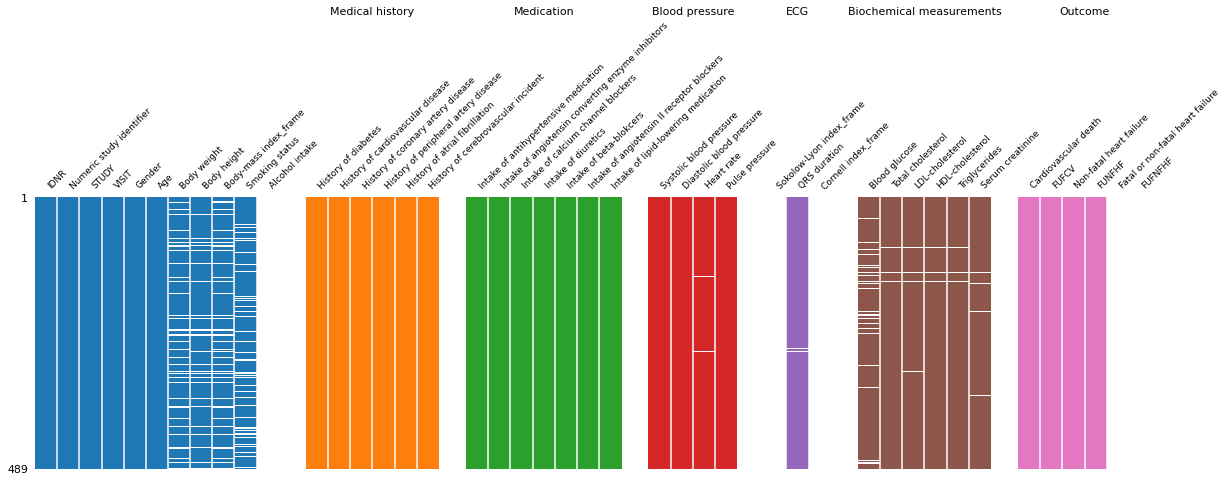

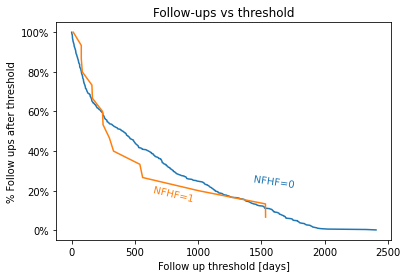

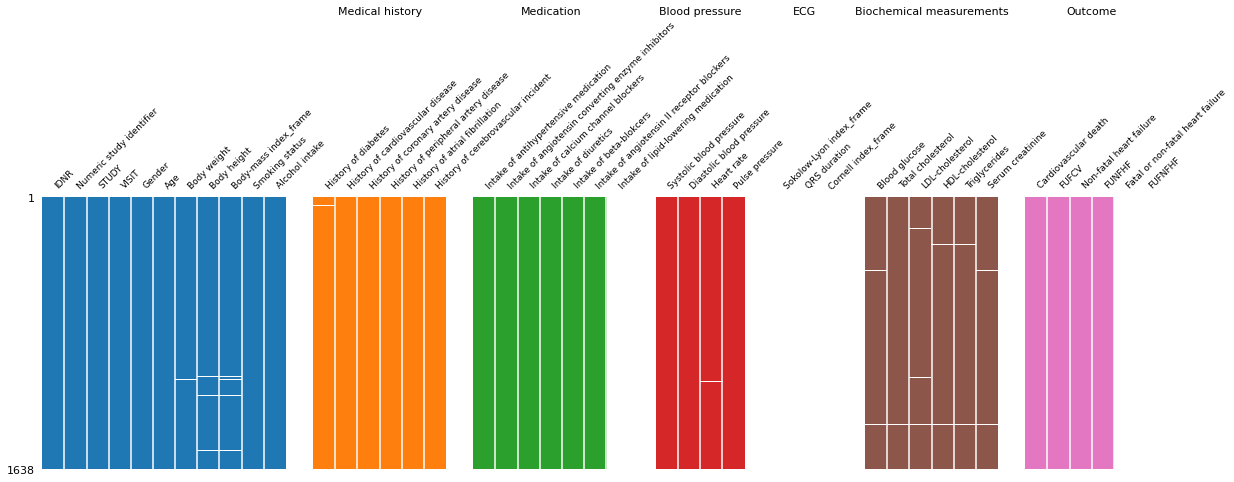

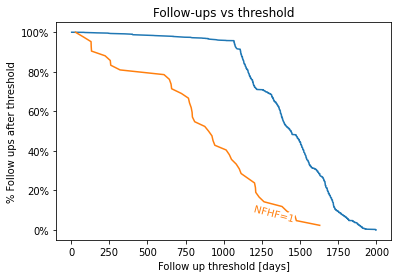

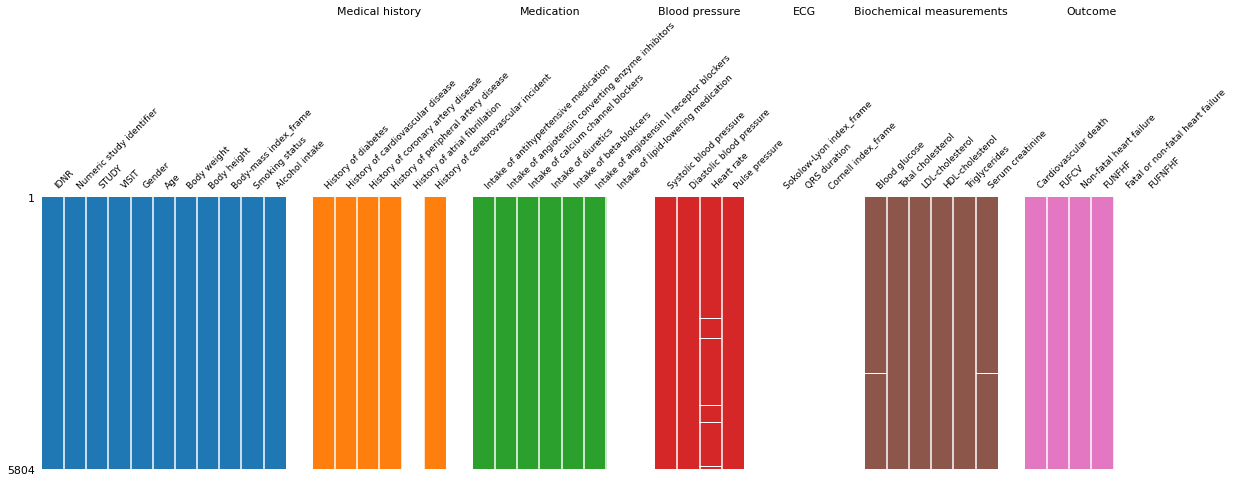

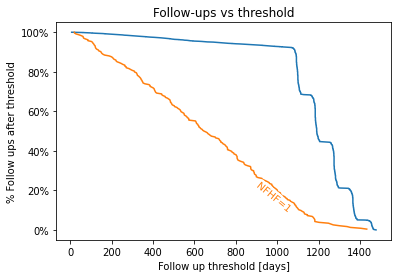

In [8]:
from hcve_lib.visualisation import h2
from labellines import labelLines
from hcve_lib.analysis import follow_ups_vs_threshold

for study_num, cohort in data.groupby('STUDY_NUM'):
    h2(f'{format_value(study_num, find_item("STUDY_NUM", metadata))} (n={len(cohort)})')
    missing_values(
        cohort,
        metadata,
    )
    pyplot.show()

    follow_ups_vs_threshold(cohort[cohort['NFHF'] == 0]['FUNFHF'], label='NFHF=0')
    follow_ups_vs_threshold(cohort[cohort['NFHF'] == 1]['FUNFHF'], label='NFHF=1')
    labelLines(pyplot.gca().get_lines(), zorder=2.5, yoffsets=[0.15, -0.05])
    pyplot.show()
    p(f'NFHF: IP={format_percents(len(cohort["NFHF"][cohort["NFHF"] == 1]) / len(cohort))}; n={len(cohort["NFHF"][cohort["NFHF"] == 1])}')
    p(f'FCV: IP={format_percents(len(cohort["FCV"][cohort["FCV"] == 1]) / len(cohort))}; n={len(cohort["FCV"][cohort["FCV"] == 1])}')
    print()